**Question1: Data Manipulation**

**a. Read the provided CSV file ‘data.csv’.**
**b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF**


In [43]:
import pandas as pd

data = pd.read_csv("data.csv") #it reads the data.csv file
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [24]:
import numpy as np
#it imports numpy alias np

**c. Show the basic statistical description about the data.**

In [44]:
data.describe()
#describe() shows the statistical data

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


**d. Check if the data has null values.
i. Replace the null values with the mean**

In [26]:
data.isnull().any()
#it will the check the null value if it has any.

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [45]:
data.fillna(data.mean(), inplace=True)
data.isnull().any()
# it will replace the null values with the mean values if there anyone is present.

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

**e. Select at least two columns and aggregate the data using: min, max, count, mean.**

In [46]:
data.agg({'Duration':['min','max','count','mean'],'Pulse':['min','max','count','mean']})
#duration and pulse columns data displayed acc. to the above functions.

,Duration,Pulse
min,15.000000,80.000000
max,300.000000,159.000000
count,169.000000,169.000000
mean,63.846154,107.461538


**f. Filter the dataframe to select the rows with calories values between 500 and 1000.**

In [47]:
data.loc[(data['Calories']>500)&(data['Calories']<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


**g. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.**

In [48]:
data.loc[(data['Calories']>500)&(data['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


**h. Create a new “df_modified” dataframe that contains all the columns from df except for
“Maxpulse”.**

In [49]:
df_modified = data[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


**i. Delete the “Maxpulse” column from the main df dataframe**

In [32]:
del data['Maxpulse']

In [50]:
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


**j. Convert the datatype of Calories column to int datatype.**

In [34]:
data.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [51]:
data['Calories'] = data['Calories'].astype(np.int64)
data.dtypes

Duration    int64
Pulse       int64
Maxpulse    int64
Calories    int64
dtype: object

**k. Using pandas create a scatter plot for the two columns (Duration and Calories).**

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

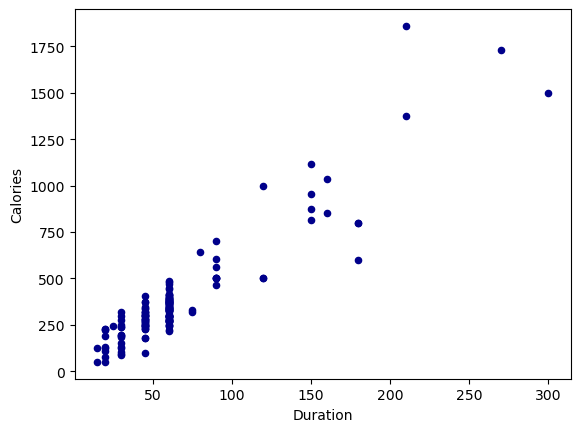

In [52]:
data.plot.scatter(x='Duration',y='Calories',c='DarkBlue')
#it creates a scatter plot with x as duration & y as calories with the colour dark blue

**Question2: Linear Regression** 

In [37]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
#Importing Libraries

**a) Import the given “Salary_Data.csv”**

In [38]:
df=pd.read_csv("Salary_Data.csv") #it reads the salary_Data.csv file
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.**

In [53]:
X = df.iloc[:, :-1].values 
#to get a copy of dataset exclude last column
y = df.iloc[:, 1].values 
#to get array of dataset in column 1st

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


**c) Train and predict the model.**

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

**d) Calculate the mean_squared error**

In [54]:
from sklearn.metrics import mean_squared_error

r=mean_squared_error(y_test,y_pred) 
#calculates the mean squared error and displays the output
print(r)

21026037.329511303


**e) Visualize both train and test data using scatter plot.**

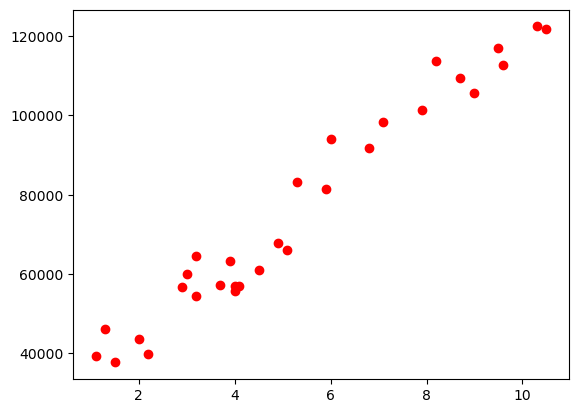

In [55]:
plt.scatter(x = df['YearsExperience'],y = df['Salary'],c='r')
#it creates a scatter plot with x as YearsEcperience & y as salary with the colour red